# Data Selection : Feature Understanding

In [92]:
import pandas as pd

In [93]:
# Loading the dataset

train_df = pd.read_csv('/content/train.csv')


In [94]:
train_df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [95]:
train_df['status'].value_counts()

,count
status,
Placed,148
Not Placed,67


In [96]:
print("Shape of train_df:", train_df.shape)
train_df.info()

Shape of train_df: (215, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


#Data Preprocessing

Categorical Features’ Distribution. This is to check the distribution of the categorical features to find imbalances, rare classes, typos, encoding needs. I used bar plot to visualize the distribution.

The salary column is the only one with missing data, and it’s likely missing for students who were not placed (because no job = no salary)

To check if all missing salary rows are from “Not Placed” students, I ran the following code :

In [98]:
train_df.isnull().sum()


,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


To check if all missing salary rows are from “Not Placed” students, I ran the following code :

In [99]:
train_df[train_df['salary'].isnull()]['status'].value_counts()


,count
status,
Not Placed,67


•	All 67 missing salary values are from students who were Not Placed
•	This means that salary is only available for placed students, which makes total sense in this case.


In [100]:
train_df = train_df.drop(columns=['salary', 'sl_no'])

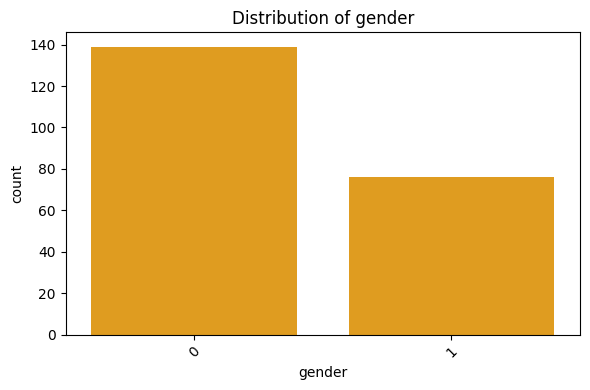

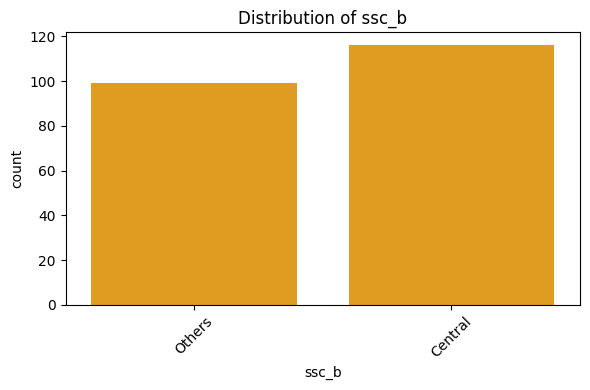

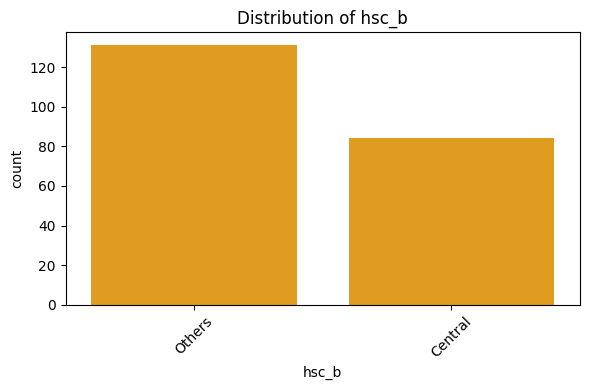

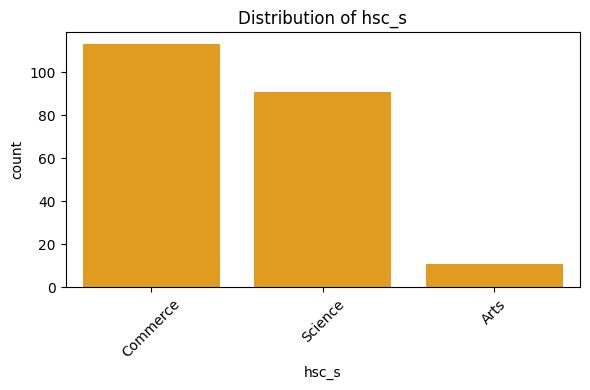

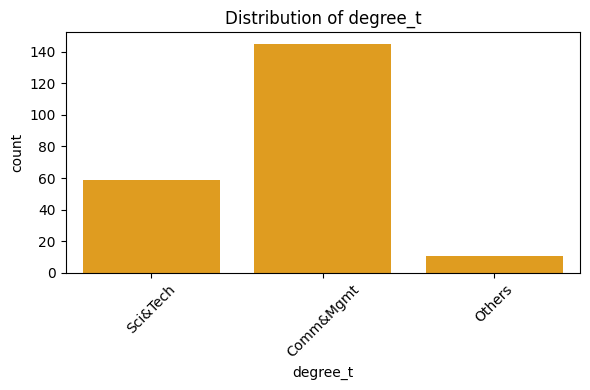

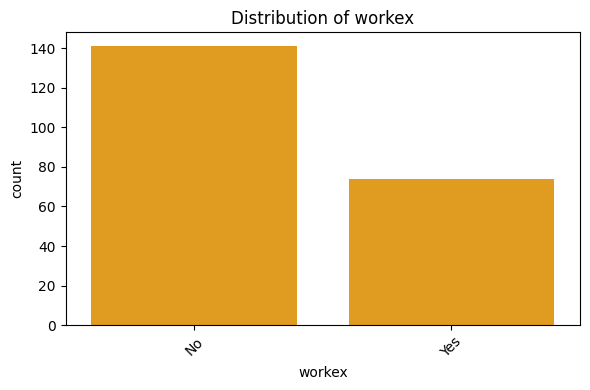

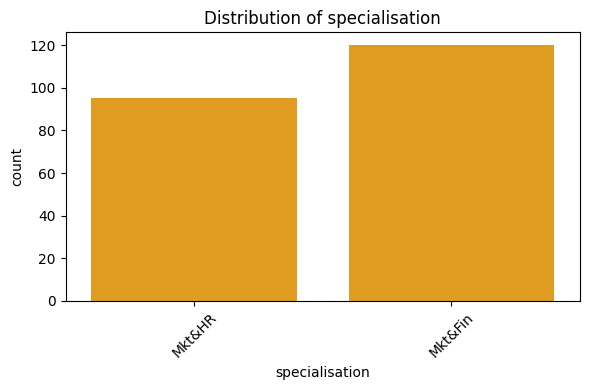

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=train_df, color='orange')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Numerical Features’ Distribution. This is to check if the dataset has outliers, to spot skewed distributions and to decide whether scaling or transformation is needed.

In [101]:
numerical_cols = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
train_df[numerical_cols].describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


Encoding Categorical Features

In [102]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Make a copy to keep the original safe
df_encoded = train_df.copy()

# binary categorical columns
binary_cols = ['ssc_b', 'hsc_b', 'workex', 'specialisation', 'status']

# Converts all binary columns to 0 and 1
le = LabelEncoder()
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# One-Hot Encoding for multiclass categorical columns
df_encoded = pd.get_dummies(df_encoded, columns=['hsc_s', 'degree_t'], drop_first=True)


In [103]:
df_encoded.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech
0,0,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,True,False,False,True
1,0,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,False,True,False,True
2,0,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,False,False,False,False
3,0,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,False,True,False,True
4,0,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,True,False,False,False


Drop Salary and sl_no

Train/Test Split

In [104]:
from sklearn.model_selection import train_test_split

# 1. Separate features and target
X = df_encoded.drop('status', axis=1)
y = df_encoded['status']

# 2. Split the data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [105]:
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 150
Test set size: 65


# Model Selection and Hyperparameter tuning

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


Logistic Regression Tuning

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define valid parameter combinations
log_params = [
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear']},
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear']},
    {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['saga']}
]

# Initialize GridSearchCV with extended options
log_model = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=5000),
    param_grid=log_params,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

# Run the search
print("Tuning Logistic Regression with expanded grid...")
log_model.fit(X_train, y_train)

# Show best params
print("Best Logistic Regression Params:", log_model.best_params_)

# Save the best estimator
best_log_model = log_model.best_estimator_


Tuning Logistic Regression with expanded grid...
Best Logistic Regression Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


Logistic Regression Evaluation

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using the best Logistic Regression model
y_pred_lr = best_log_model.predict(X_test)

# Evaluation Metrics
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(" Logistic Regression Evaluation Metrics:")
print(f"Accuracy     : {acc_lr:.4f}")
print(f"Precision    : {prec_lr:.4f}")
print(f"Recall       : {recall_lr:.4f}")
print(f"F1 Score     : {f1_lr:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=["Not Placed", "Placed"]))




 Logistic Regression Evaluation Metrics:
Accuracy     : 0.7385
Precision    : 0.7692
Recall       : 0.8889
F1 Score     : 0.8247

Classification Report:
              precision    recall  f1-score   support

  Not Placed       0.62      0.40      0.48        20
      Placed       0.77      0.89      0.82        45

    accuracy                           0.74        65
   macro avg       0.69      0.64      0.65        65
weighted avg       0.72      0.74      0.72        65



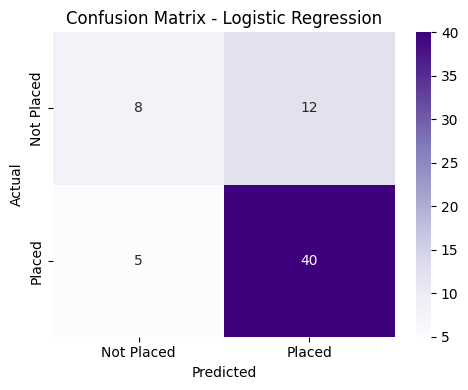

In [83]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Purples',
            xticklabels=["Not Placed", "Placed"],
            yticklabels=["Not Placed", "Placed"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Random Forest Tuning and training

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Define the base model
rf_model = RandomForestClassifier(random_state=42)

# Step 2: Set up hyperparameter grid
rf_params = {
    'n_estimators': [50, 100, 200],       # number of trees
    'max_depth': [None, 5, 10, 20],       # depth of each tree
    'min_samples_split': [2, 5, 10],      # minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],        # minimum samples at a leaf node
    'criterion': ['gini', 'entropy']      # splitting criteria
}

# Step 3: Perform GridSearchCV
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid=rf_params,
                       cv=5,
                       scoring='f1',
                       n_jobs=-1,
                       verbose=1)

# Fit to training data
rf_grid.fit(X_train, y_train)

# Best model
best_rf_model = rf_grid.best_estimator_
print(" Best Random Forest Params:", rf_grid.best_params_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
✅ Best Random Forest Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


Random Forest Evaluation

 Random Forest Evaluation Metrics:
Accuracy     : 0.8615
Precision    : 0.8462
Recall       : 0.9778
F1 Score     : 0.9072

Classification Report:
              precision    recall  f1-score   support

  Not Placed       0.92      0.60      0.73        20
      Placed       0.85      0.98      0.91        45

    accuracy                           0.86        65
   macro avg       0.88      0.79      0.82        65
weighted avg       0.87      0.86      0.85        65



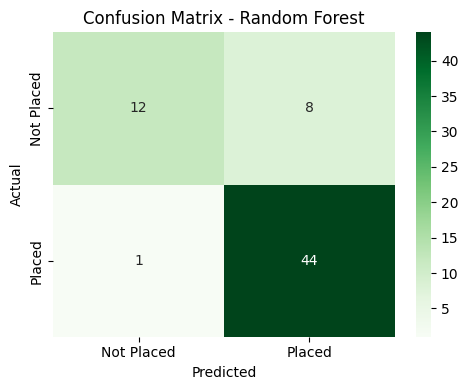

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict with best Random Forest model
y_pred_rf = best_rf_model.predict(X_test)

# Metrics
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(" Random Forest Evaluation Metrics:")
print(f"Accuracy     : {acc_rf:.4f}")
print(f"Precision    : {prec_rf:.4f}")
print(f"Recall       : {recall_rf:.4f}")
print(f"F1 Score     : {f1_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=["Not Placed", "Placed"]))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=["Not Placed", "Placed"],
            yticklabels=["Not Placed", "Placed"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


Support Vector Machine (SVM) Tuning

In [109]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Step 1: Define the base SVM model
svm_model = SVC(probability=True, random_state=42)

# Step 2: Set up the hyperparameter grid
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Step 3: Perform GridSearchCV
svm_grid = GridSearchCV(estimator=svm_model,
                        param_grid=svm_params,
                        scoring='f1',
                        cv=5,
                        n_jobs=-1,
                        verbose=1)

# Fit to training data
svm_grid.fit(X_train, y_train)

# Save the best model
best_svm_model = svm_grid.best_estimator_
print(" Best SVM Params:", svm_grid.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
 Best SVM Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


Support Vector Machine (SVM) Evaluation

SVM Evaluation Metrics:
Accuracy     : 0.7846
Precision    : 0.8163
Recall       : 0.8889
F1 Score     : 0.8511

Classification Report:
              precision    recall  f1-score   support

  Not Placed       0.69      0.55      0.61        20
      Placed       0.82      0.89      0.85        45

    accuracy                           0.78        65
   macro avg       0.75      0.72      0.73        65
weighted avg       0.78      0.78      0.78        65



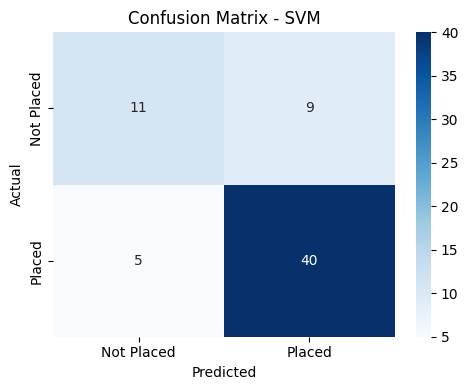

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict with best SVM model
y_pred_svm = best_svm_model.predict(X_test)

# Metrics
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("SVM Evaluation Metrics:")
print(f"Accuracy     : {acc_svm:.4f}")
print(f"Precision    : {prec_svm:.4f}")
print(f"Recall       : {recall_svm:.4f}")
print(f"F1 Score     : {f1_svm:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=["Not Placed", "Placed"]))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Placed", "Placed"],
            yticklabels=["Not Placed", "Placed"])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


 Voting Classifier Training and Evaluation

Voting Classifier Evaluation Metrics:
Accuracy     : 0.7538
Precision    : 0.7736
Recall       : 0.9111
F1 Score     : 0.8367

Classification Report:
              precision    recall  f1-score   support

  Not Placed       0.67      0.40      0.50        20
      Placed       0.77      0.91      0.84        45

    accuracy                           0.75        65
   macro avg       0.72      0.66      0.67        65
weighted avg       0.74      0.75      0.73        65



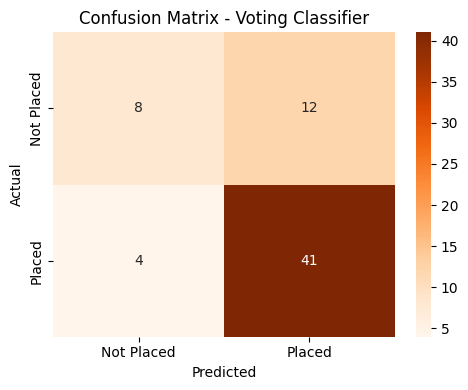

In [90]:
from sklearn.ensemble import VotingClassifier

# Step 1: Create Voting Classifier with soft voting

voting_clf = VotingClassifier(
    estimators=[
        ('lr', best_log_model),
        ('rf', best_rf_model),
        ('svm', best_svm_model)
    ],
    voting='soft'
)

# Step 2: Fit to training data
voting_clf.fit(X_train, y_train)

# Step 3: Predict on test set
y_pred_vote = voting_clf.predict(X_test)

# Step 4: Evaluate
acc_vote = accuracy_score(y_test, y_pred_vote)
prec_vote = precision_score(y_test, y_pred_vote)
recall_vote = recall_score(y_test, y_pred_vote)
f1_vote = f1_score(y_test, y_pred_vote)

print("Voting Classifier Evaluation Metrics:")
print(f"Accuracy     : {acc_vote:.4f}")
print(f"Precision    : {prec_vote:.4f}")
print(f"Recall       : {recall_vote:.4f}")
print(f"F1 Score     : {f1_vote:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_vote, target_names=["Not Placed", "Placed"]))

# Confusion Matrix
cm_vote = confusion_matrix(y_test, y_pred_vote)
plt.figure(figsize=(5,4))
sns.heatmap(cm_vote, annot=True, fmt='d', cmap='Oranges',
            xticklabels=["Not Placed", "Placed"],
            yticklabels=["Not Placed", "Placed"])
plt.title("Confusion Matrix - Voting Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


#Model Performance Comparison - Bar Chart

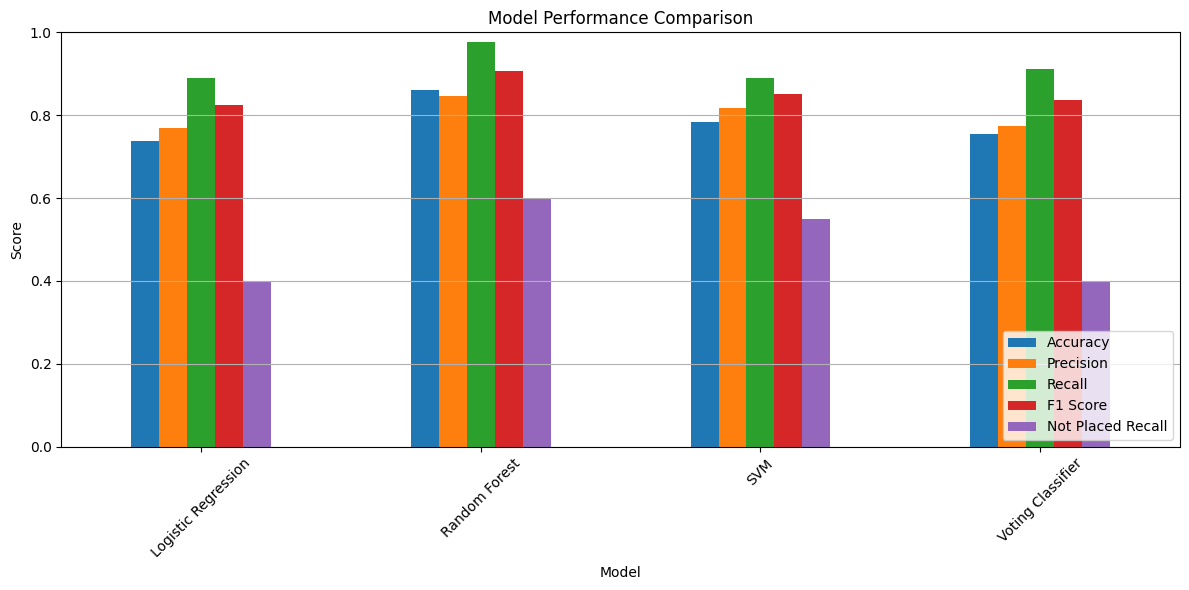

In [91]:
import matplotlib.pyplot as plt
import pandas as pd

# Data to plot
models = ['Logistic Regression', 'Random Forest', 'SVM', 'Voting Classifier']
accuracy = [0.7385, 0.8615, 0.7846, 0.7538]
precision = [0.7692, 0.8462, 0.8163, 0.7736]
recall = [0.8889, 0.9778, 0.8889, 0.9111]
f1 = [0.8247, 0.9072, 0.8511, 0.8367]
not_placed_recall = [0.40, 0.60, 0.55, 0.40]

# Create a DataFrame for plotting
df_plot = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Not Placed Recall': not_placed_recall
})

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
df_plot.set_index('Model').plot(kind='bar', ax=ax)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.grid(axis='y')

plt.show()
